<a href="https://colab.research.google.com/github/ekdnam/NLG/blob/master/Fatalism/Code/Fatalism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [0]:
def preprocess_text_file():
  file_name_base = 'poem-'
  file_extension = '.txt'

  process_name = 'processed'
  i = 1
  for i in range(1, self.n_poems + 1):
    processed_poem = []
    # get file name, file_name_format - 'kipling-1.txt'
    read_file_name = file_name_base + str(i) + file_extension
    file_read = open(read_file_name, 'r')
    
    # read file, append to a list
    for x in file_read:
      processed_poem.append(x)
      
    # close the file
    file_read.close()

    # convert to string
    processed_poem = str(processed_poem)

    # processed file name - 'processed-1.txt'    
    write_file_name = process_name + '-' + str(i) + file_extension

    file_write = open(write_file_name, 'w')

    # write string to file
    file_write.write(processed_poem)
    file_write.close()




In [0]:
def get_training_data(base_file_name):
  file_read = open(base_file_name, 'r')

  data_list = []
  for x in file_read:
    data_list.append(x)

  train_data = str(data_list)
  return train_data

In [0]:
def alternative_get_data():
  train_data = "b'  Though the word ?fatalism? is commonly used to refer to an attitude of resignation in the face of some future event or events which are thought to be inevitable, philosophers usually use the word to refer to the view that we are powerless to do anything other than what we actually do. This view may be argued for in various ways: by appeal to logical laws and metaphysical necessities; by appeal to the existence and nature of God; by appeal to causal determinism. When argued for in the first way, it is commonly called ?Logical fatalism?  or, in some cases, ?Metaphysical fatalism? ; when argued for in the second way, it is commonly called ?Theological fatalism?. When argued for in the third way it is not now commonly referred to as ?fatalism? at all, and such arguments will not be discussed here.   The interest in arguments for fatalism lies at least as much in the question of how the conclusion may be avoided as in the question of whether it is true.   The classic argument for fatalism occurs in Aristotle  384?322 B.C.E. , De Interpretatione, chapter 9. He addresses the question of whether in relation to all questions it is necessary that the affirmation or the negation is true or false.   What he says could be presented as an argument along the following lines.   Suppose that  i  p is true or p is false and  ii  not-p is true or not-p is false.   Then p is true or not-p is true.   Now suppose that in 1900 one person says that a sea-battle will take place on 1/1/2100, and another says that a sea-battle will not take place on 1/1/2100.   Then either what the first person says is true or what the second person says is true.   But, in that case, either it is necessary in 1900 that a sea-battle takes place on 1/1/2100, or it is necessary in 1900 that one does not take place.   But the date of the predictions is irrelevant, and it is irrelevant whether any prediction is actually made at all.   So it is necessary at all times that a sea-battle takes place on 1/1/2100, or that a sea-battle does not take place on 1/1/2100.   But the argument can evidently be generalised.   So, everything that happens, happens of necessity.   First of all we need to be clear about what is meant by ?necessity? here. What is at issue here is not logical necessity. It is rather inevitability. When the occurrence of a sea-battle on 1/1/2100 is said to be necessary at a certain date, what is meant is that at that date nothing can prevent a sea-battle from taking place on 1/1/2100. In particular, no one has the power to prevent it. Now Aristotle accepts that ?What is, necessarily is, when it is; and what is not, necessarily is not, when it is not.? So, he accepts that, if a sea-battle is actually taking place on 1/1/2100, then on 1/1/2100 it is  in this sense  taking place of necessity. Nothing can then stop it happening, because it is happening. What this argument appears to establish, however, is that, if a sea-battle takes place on 1/1/2100, not only is it necessary then that a sea-battle takes place on 1/1/2100, but it was always necessary. No one could ever have prevented it. And the same applies to everything that can happen. So, in particular, no one ever has the power to do anything other that what they actually do.   So, is there anything wrong with the argument?   Well certainly there is a move which seems to require some explanation: the move from truth to necessity. Why should it follow from the fact that it was true in 1900 that a sea-battle would take place on 1/1/2100, that it was necessary that it should? This looks, indeed, suspiciously like a fallacious move from ?Of necessity, if it is true that a sea-battle takes place on 1/1/2100, a sea-battle takes place on 1/1/2100? to ?If it is true that a sea-battle takes place on 1/1/2100, a sea-battle takes place of necessity on 1/1/2100?. But such suspicions are probably ill-founded. It is more likely that the move invokes a certain form of the correspondence theory of truth: if what someone says at a certain time is true, then the state of the world at that time must be such as to make it true. But since what is, necessarily is when it is, the state of the world will be necessary. So, anything that is true is necessarily true.   However, even if this crucial move does not rest on a simple fallacy, the idea that the truth of what someone says is determined by the state of the world at the time is questionable. We shall return to this point.   First we should notice Aristotle?s solution. Aristotle is in no doubt that not everything that happens, happens of necessity. He accepts indeed  19a23?5  that ?What is, necessarily is, when it is; and what is not, necessarily is not, when it is not.? But he goes on to say, ?But not everything that is, necessarily is; and not everything that is not, necessarily is not.? So what is his solution? Here it must be said that there is more than one view.  Aristotle, Categories and De Interpretatione, 137?42 . On one view he rejects the move from truth to necessity. That may indeed be the right move to make, but in what follows I shall take it that Aristotle actually offers a different solution, which, rightly or wrongly, I shall refer to as ?the Aristotelian solution?. On this view his solution is to deny that it is necessary that the affirmation or the negation is true or false when this relates to things that do not happen of necessity. That is to say, his solution is that neither what the first person said in 1900  ?There will be a sea-battle on 1/1/2100.?  nor what the second person said  ?There will not be a sea-battle on 1/1/2100.?  was true. What each person said was in fact neither true nor false. So we may represent the Aristotelian solution as one which rejects the law of bivalence:   It is to be rejected in particular in relation to such propositions as, ?there will be a sea-battle on 1/1/2100?; that is, in relation to propositions about future contingents, about what is neither necessary nor impossible.  For the view that Aristotle does not reject the law of bivalence see Whitaker 1996.    Though Aristotle does not explicitly say so, it seems that he would also accept that if a sea-battle takes place on 1/1/2100, then what the first person said would then be true, and if it does not, what the second person said would then be true. So we may represent the Aristotelian solution as holding the following:   Are there any objections to this solution?   One objection is that the solution appears to require the rejection of the law of the excluded middle in addition to the law of bivalence. Now it is true that it involves the rejection of one form of the law:   But another form of the law is:   Does it involve the rejection of this? One might think it does, on the grounds that ?p? is equivalent to ?p is true?. So LEM1 and LEM2 stand or fall together. Or one might think like this: ?p or q? can be true only if either p is true or q is true  or both are . But, where p is a proposition about a future contingent it is not true, whether the contingent state of affairs comes about or not; neither is its negation true; so the disjunction, ?p or not-p? is not true.   As a matter of fact, though, this is not what Aristotle seems to have thought. He says  19a28?32 :   So, on the assumption that he would have accepted that ?there will or will not be a sea-battle tomorrow? is equivalent to ?there will be a sea-battle tomorrow or there will not be a sea-battle tomorrow?, he would, it seems, have accepted LEM2. How could this be? Well, what stops its being true that there will be a sea-battle tomorrow is that there is nothing yet to determine that it is true. But there is something to determine that there will be or will not be a sea-battle tomorrow; in the nature of things one or the other must occur. So it is now true that there will be a sea-battle tomorrow or there will not be a sea-battle tomorrow.   This suggests adopting the following rule for determining the truth-value of complex propositions some of whose constituents are neither true nor false. One considers in turn each of the possible ways in which things may turn out, and works out what truth-value the complex proposition would then have. If it turns out to be true in every case, it is true; if it turns out to be false in every case, it is false; otherwise it is neither true nor false.  van Fraassen 1966    Of course this is not a wholly cost free line to take. Apart from the fact that it means that ?p? and ?p is true? are not in general interchangeable, it also creates problems for truth-functionality. We normally think of ?or?, ?and? and ?not? as being truth-functional. That is to say, we think that the truth-values of ?p or q?, ?p and q? and ?not-p? are determined by the truth-values of ?p? and ?q?. But if we adopt the Aristotelian solution, and accept the way outlined just now of determining the truth-value of a complex proposition, ?or?, for instance, will not be truth functional. In some case ?p or q? will be true when neither p nor q is true  when, for instance, ?q? is ?not-p? , and in some case it will not be  if, say, ?p? is ?there will be a sea-battle tomorrow? and ?q? is ?there will be a football match tomorrow? .  If one thinks in terms of there being a third truth-value, indeterminacy, say, in addition to truth and falsity, the position will be that, when p and q are both indeterminate, sometimes ?p or q? is true, and sometimes it is indeterminate. . Similarly ?p and q? will be false in the one case and indeterminate in the other.   However, this objection might not seem very pressing compared with the threat of fatalism. If accepting a lack of equivalence between ?p? and ?p is true? and a failure of truth-functionality for ?or? and ?and? were the only alternative to accepting fatalism, most people would find it easier to accept these theoretical oddities, if oddities they are.   But there is another objection to the Aristotelian solution which makes it harder to accept ? the way we treat bare predictions. If someone had said in 1972, ?Red Rum will win the Grand National next year?, surely, we would think, he was right. Not right in 1973, but right in 1972. That is to say, surely what he said was true, when he said it; not just later. Of course, we would not have known in 1972 that what he said was true; nor, presumably did he. Nor, of course would we have supposed that there was anything inevitable about the victory; these things, we naturally suppose, are a matter of chance. But, of course, this objection to the Aristotelian solution is also an objection to the argument for fatalism which was based on the assumption of bivalence. We are, effectively, rejecting the idea that if what someone says at a time is true at that time, then the state of the world at the time must determine that it is true. What we seem to be quite prepared to accept instead is the idea that for what is said to be true at a time it is sufficient if the state of the world will sometime be such as to determine that it is true.   There is another problem about the theory of truth which the Aristotelian argument seems to be invoking. If the theory really is that the truth of what is said depends on the state of the world at the time of the saying, does not that raise a problem for statements about the past? Suppose someone says that a dinosaur stood on this spot millions of years ago. For this to be true, must the present state of the world be such as to determine that it is? Some people have indeed thought this; and they have thought that, just as some propositions that were not true come to be true, so also some that were true cease to be true.  ?ukasiewicz 1967  But this is even further from what we are naturally inclined to say. A more attractive alternative, if we wished to retain something like this theory of truth, would be to say that what happened in the past counts as part of the present state of the world, because the past, like the present, is necessary. But it is not clear why that should be enough to make it part of the present state of the world. Perhaps it would be better to take the view simply that something is true at a time only if it is necessary at that time. But then we would need some argument for this position which went beyond the simple thought that what is said is made true by the way the world is at the time it is said.   It is worth noticing some other solutions which are closely related to the Aristotelian solution, but avoid some of the problems.   1.  Prior 1967 . One could agree with Aristotle that ?there will be a sea-battle tomorrow? is not true, even if it turns out that there is a sea battle; but instead of saying that it is neither true nor false, one could say that it is false. What is more, one could say that the negation, ?there will not be a sea-battle tomorrow? is true. Then we could retain the law of bivalence, and the equivalence between ?p? and ?p is true?. Effectively we would be treating ?p? as equivalent to ?it is necessary that p?. And we would, no doubt, distinguish between ?there will not be a sea-battle tomorrow?, where this is the negation of ?there will be a sea-battle tomorrow? and ?there will be no sea-battle tomorrow? which, like ?there will be a sea-battle tomorrow?, is false. One might even say that ?there will not be a sea-battle tomorrow? is ambiguous; it could be equivalent to ?it is not necessary that there will be sea-battle tomorrow? or it could be equivalent to ?it is necessary that there will be no sea-battle tomorrow?. Certainly it is in favour of this view that one would retain the law of bivalence and also the truth-functionality of ?or? and ?and?. But there would be a heavy price to pay. Now we should have to say what the person said about Red Rum was false.   2.  Lucas 1986  One could make use of Reichenbach?s distinction between the time of the utterance of a proposition, the time of the reference point and the time of the event.  Reichenbach 1947  One could then say that the truth of what is said depends not on the state of the world at the time of the utterance, but on the state of the world at the time of the reference point. One may then say that the reference point of the utterance in 1972 of ?Red Rum will win the Grand National next year? is 1973, not 1972. So, it was true.  Whereas, if someone had said ?Red Rum is going to win the Grand National next year?, the use of ?is going to? rather than ?will? might perhaps have meant that the reference point was the time of the utterance, rather than the time of next year?s Grand National. So what was said would not have been true.    3.  Tooley 1997  One could distinguish between truth at a time, which depends on the state of the world at the time, and truth simpliciter, which does not. One could then allow that the prediction about Red Rum was true, as long as we are talking about truth simpliciter. Also, where truth simpliciter was at issue, we could retain the law of bivalence and the equivalence between ?p? and ?p is true?.   But finally we should not forget that, even if we wish to retain a correspondence theory of truth, we can reject the idea that truth depends on the state of the world at the time of the utterance of a proposition or even the state of the world at the time of the reference point. We can say that it depends on the state of the world at the time of the event spoken of; or, more generally, that it depends on the state of the world at the times spoken of, if any  Westphal 2006 . The solution we prefer is, however, likely to be related to the view we take about the nature of time.   On a B-theory of time an event?s being past, present or future is simply a relational matter; it is simply a matter of its occurring at a time which is earlier than, or simultaneous with, or later than some time which is taken as the reference point ? the time at which I am having this thought, say. On an A-theory, on the other hand, that this time  or this event  is now is an absolute  if temporary  fact about it. But, in addition, a B-theory will typically hold that all times are equally real, whereas, typically, an A-theory will hold either that only the present and the past are real  type 1 , or that only the present is real  type 2 . So, on a B-theory, there can be future facts to make propositions about the future true; but, on an A-theory of type 1, a proposition about the future can be made true only by present and past facts together with timeless facts; and, on an A-theory of type 2, propositions both about the future and about the past, can be made true only by present facts together with timeless facts. And, evidently, on either type of A-theory a proposition may be true at one time, but not true at another, depending on what facts exist at the time.   For a fuller  description of the A-theory and B-theory, see the Section  5 of the entry on   time.      Aristotle?s problem seemed to have arisen as a result of a theory of truth according to which, if a statement is true at a time, there has to be a state of the world at that time which makes it true. However, it has been argued that, if every meaningful statement is either true or false  once and for all , that alone implies fatalism; the very fact that a statement is true is enough to make what it describes unavoidable  Taylor 1983, Chapter 6 . Suppose, for example, that John shaved one morning. Then the statement, ?John shaved that morning?, is true. But, it is argued, that means that John did not have the power not to shave; because to have that power would be to have the power to render a true statement false. But no one has such a power; no one has ever succeeded in making a true statement false.  Now the final claim is certainly true, on the assumption that meaningful statements have just one truth-value. No one has ever brought about a situation in which a statement which was true is false; that is, a situation in which  a  there is a statement which was true and  b  that statement is now false. However, to have the power to render a true statement false, one does need to have the power to bring about such a situation. It is enough that  a  there should be a statement which is true, and that one has the power merely to bring about a situation in which  b  that statement is  and always was  false instead. So for John to have had the power to render false the true statement, ?John shaved that morning?, it is enough that he should have had the power not to shave instead of shaving. Of course, he did not exercise that power; but, in the absence of some other argument to the contrary, presumably he could have done; in which case he would have made the statement, ?John shaved that morning? false instead of true. So, it seems that there is no simple move from truth to fatalism.   Diodorus Cronus  late 4th ? early 3rd centuries B.C.E.  had an argument for fatalism, known as ?The Master Argument?. Its conclusion was, ?the possible is that which either is or will be?. We know the premisses but, unfortunately we do not know the intermediate steps. The premisses were  1  ?Everything that is past and true is necessary?,  2  ?The impossible does not follow from the possible?.  Kneale and Kneale 1962, 119    I shall not try to reconstruct the way the argument actually went, but consider an argument to it which might have been akin, which argues for fatalism on the basis of the necessity of the past. The argument goes:   What is true of the past is necessary.   Suppose that there is a sea-battle on 1/1/2100.   Then it was true in 1900 that there would be a sea-battle on 1/1/2100.   Then it was true of the past that there would be a sea-battle on 1/1/2100.   So it is necessary that there will be a sea-battle on 1/1/2100.   Therefore, if there is a sea-battle on 1/1/2100, it is necessary that there will be a sea-battle on 1/1/2100  and impossible that there should not be .   Is anything wrong with this argument?   We could certainly make an Aristotelian objection to the argument. We could deny that if a sea-battle takes place on 1/1/2100, it was true in 1900 that a sea-battle would take place.   We could also question either the first premiss or the application of it.   Is what is true of the past necessary? Well certainly pretty well everyone thinks that what happened in the past cannot be undone. The past cannot now be altered. For if one were to undo the past, that would mean that something which did happen did not happen; or, at the very least, that it was true that something happened and then later was not true that it happened. Most people  but not such a large majority  also think that something else is impossible, namely affecting what happened in the past or causing something to have happened in the past.  This is not the same thing, of course, as altering the past. If one caused something to have happened, one would not thereby bring it about that something that did not happen did happen.  But it is one thing to think that one cannot make it true that there was a sea-battle yesterday, and quite another thing to think that one cannot make it true yesterday that there will be a sea-battle tomorrow.   This might be called the Ockhamist solution to the problem. What Ockham  c1285?1347  says is:   In the spirit of this we may say that some propositions about the past are really  at any rate in part  about the future. And in these cases they are not necessary. And we may then apply this to ?it was true in 1900 that there would be a sea-battle on 1/1/2100.? This, we may say, is  in part  really about 1/1/2100.   Propositions which are in this way verbally about one time, t, but are really  in part  about a later time, are often said to express ?soft facts? about t. Unfortunately it is not at all clear quite how the notion of a soft fact should be made precise. One might, for instance, say that if a proposition about t logically entails a proposition about a later time, it expresses a soft fact about t. But if that is the correct account, it seems that many propositions expressing soft facts about the past will be necessary, even when they are partly about the future. For instance, a proposition which conjoins some plausibly necessary proposition about the past with a law of nature to the effect that in these circumstances something in the future will ensue would seem to entail something about the future; but since it is a conjunction of two plausibly necessary propositions, it seems to be necessary itself.   However it seems there is one variety of proposition which presumably expresses a soft fact about the past, but is very plausibly not necessary, namely a proposition which is equivalent to a conjunction where one of the conjuncts is plausibly wholly about the future, and where the other conjunct does not entail it. And, if the Aristotelian solution is wrong, our example seems to fit this bill. The proposition, ?it was true in 1900 that there would be a sea-battle on 1/1/2100? is plausibly equivalent to ?there was such a time as 1900 and there will be a sea-battle on 1/1/2100.? And this proposition will not be necessary, if it is not necessary that there will be a sea-battle on 1/1/2100.   Notice that this does not show that the fatalist is wrong. It could still be that the proposition that there will be a sea-battle on 1/1/2100 is necessary. But it does seem to show that this argument does not show that fatalism is correct. The position seems to be that, either the argument does not work, because the Aristotelian solution is correct, or the argument does not work because, in the absence of an independent reason to suppose that the proposition that there will be a sea-battle on 1/1/2100 is necessary, we have no reason to suppose that the proposition, ?it was true in 1900 that there would be a sea-battle on 1/1/2100? is a necessary proposition.   Richard Taylor argues that certain commonly accepted presuppositions yield a proof of fatalism.  Taylor 1962  The presuppositions are:   1. Any proposition whatever is either true, or if not true, false.   2. If any state of affairs is sufficient for, though logically unrelated to, the occurrence of some further condition at the same time or any other time, then the former cannot occur without the latter occurring also.   3. If the occurrence of any condition is necessary for, though logically unrelated to, the occurrence of some other condition at the same time, or any other time, then the latter cannot occur without the former occurring also.   4. If one condition or set of conditions is sufficient for  ensures  another, then the other is necessary  essential  for it, and conversely, if one condition or set of conditions is necessary  essential  for another, then that other is sufficient for  ensures  it.   5. No agent can perform any given act if there is lacking, at the same time or any other time, some condition necessary for the occurrence of that act.   6. Time is not by itself ?efficacious?; that is, the mere passage of time does not augment or diminish the capacities of anything and, in particular, it does not enhance or decrease an agent?s powers or abilities.   He then produces an argument to show  what most of us believe  that either it is not in my power to read a headline saying that there was a sea-battle yesterday or it is not in my power to read a headline saying that there was no sea-battle yesterday, at any rate if we make some obvious assumptions about the relation between the headlines and what took place. Letting S be the act of reading a headline that there was a sea-battle, and S? be the act of reading a headline that there was no sea-battle; and letting P and P? be the propositions that there was and was not such a battle, the argument goes:   But if P? is true, then it is not in my power to do S  for a similar reason .   But either P is true or P? is true    So, either it is not in my power to do S or it is not in my power to do S?.   The argument, he claims is sound, given the six presuppositions.   But suppose, his argument continues, we let O and O? be the act of ordering a sea-battle and the act of ordering no sea-battle, and Q and Q? be the propositions that there will and will not be such a battle; and we substitute O and O? for S and S?, and Q and Q? for P and P?, and ?tomorrow? for ?yesterday? in the argument above, then  if we make some obvious assumptions about the relation between what we order and what happens  we have a parallel argument which goes:     But if Q? is true, then it is not in my power to do O  for a similar reason .   But either Q is true or Q? is true   So, either it is not in my power to do O or it is not in my power to do O?.    And this argument seems equally sound. And evidently it can be generalised to yield the fatalist conclusion that it is never in our power to do anything other than what we actually do.   Are there any objections to his argument?   Well, one might certainly object to presupposition 6, on the grounds that it does indeed seem to be the passage of time which makes a difference to my power to bring about or prevent a sea-battle on a certain day. Till the day is over, I may have the power, but after the day, I have not. However, presupposition 6 does not in fact seem to play a significant role in the parallel arguments. So that cannot be the whole story.   The objection that Taylor himself suggests is the Aristotelian one: we reject presupposition 1  and also, presupposition 6, since we embrace the idea that a proposition may fail to be either true or false at one time and come to be true or false later, as a result of the mere passage of time . We would also, presumably, need to amend presupposition 5, so that it was not the lack of a necessary condition for an act which was problematical, but the existence of a condition which was sufficient for the non-performance of the act.   Is that the only objection? Must we accept the Aristotelian solution if we wish to escape the fatalistic conclusion?   It seems that there is an alternative to the Aristotelian solution, because Taylor?s presupposition 5 seems dubious. A symptom of this is that it seems to yield the fatalist conclusion a bit too easily. For supposing that I do not perform act S  whatever it is , then it follows immediately that there is lacking a necessary condition for my performing S, namely the occurrence of S. So, if presupposition 5 is right, it follows immediately that I never have the power to perform any act which I do not actually perform. Of course, that does not show that this conclusion is wrong; but it enough to make one question the presupposition which entails it. And one might suggest that not only is this presupposition false, but that it seems true because it is easily confused with another much more plausible proposition  equivalent to Hasker?s PEP5; see Hasker 1989, 115 :   And if we substitute that for Taylor?s presupposition 5, the parallel argument is no longer sound.   It is possible, it seems, to reply to the arguments for fatalism which we have considered so far, without appealing to the Aristotelian solution. We can reject the theory of truth which is crucial to Aristotle?s argument; we can reject the idea that all statements which are about the past are necessary; we can reject Taylor?s account of the conditions of power. And we can do this without questioning the idea that we cannot affect the past, except, at any rate, in the rather ill-defined collection of cases to which Ockham draws our attention.  However, it is open to the fatalist to argue that we have no good reason for making the distinction we do between affecting the past and affecting the future. So, if we accept that we cannot affect the past, we ought also to accept that we cannot affect the future. Of course, this cuts both ways. We might equally come to the conclusion, in the absence of a good reason for making the distinction, that since we can affect the future we can also affect the past; or, if that seems outrageous, we could affect the past if natural laws did not prevent our doing so.   This objection by the fatalist is surely right about one thing. If we cannot affect the past, it would be good to know why we cannot.  One possible answer would be that which an A-theorist of time might give, namely that there is a fundamental ontological difference between the future on the one hand and the present and past on the other, which consists in the fact that the present and past are real or actual, while the future is not. And it is this fact, that the future is not real or actual, which means that it is open, can be affected by what happens now; and it is the fact that the present and past are real or actual which means that they cannot be affected by what happens now.   Lucas 1989a, Tooley 1997 .   Such accounts, as we have noted above, seem to support the Aristotelian solution. But they are not the only accounts. On some accounts there is no such fundamental ontological difference between the future and the present and past; the impossibility of affecting the past lies not in the fact that the passage of time puts a constraint on what can be caused, but rather in the fact that it is the direction of causation which determines the direction of time.  Swinburne 1994, Mellor 1981 and 1998  On yet other accounts the impossibility is simply a fundamental metaphysical fact which is not open to further analysis or explanation.   It is, of course, possible that the fatalist challenge about the difference between the future and the present and past cannot be successfully met. For instance, it could be argued  a  that the only successful answer would be one which appealed to a fundamental ontological distinction between the future and the present and past, but that  b  there is in fact no such distinction.  Shanks 1994; discussed in Oaklander 1998  But, as we have noted, even if this challenge cannot be met, it does not show that the fatalist is correct. The possibility remains that we can, in principle, affect the past.   A problem which has been much discussed by philosophers, at least since the time of Augustine  354?430 , is whether divine omniscience is compatible with free will, and in particular with our having the power to do other than we do.   One way of arguing for this incompatibility is due to Pike.  Pike 1965    Let us suppose that being omniscient involves being infallible, and believing that p if and only if it is true that p.   Let us also suppose that God existed in 1900, and that omniscience is part of his essence.   Now, suppose that Jones mowed his lawn on 1/1/2000.   Then God believed in 1900 that Jones would mow his lawn on 1/1/2000.   Did Jones have the power to refrain from mowing his lawn?   No. Because that would mean either  1  that he had the power to do something which would have brought it about that God had a false belief in 1900, or  2  that he had the power to do something which would have brought it about that God did not believe in 1900 that Jones would mow his lawn on 1/1/2000, or  3  that he had the power to do something which would have brought it about that God did not exist in 1900. And each of these alternatives is impossible.   Are there any objections to this argument?   Naturally it would be possible to object to some of the suppositions about the existence and nature of God. I will return to them.   First we should notice that the argument depends on a certain principle about power which is very similar to the plausible amended version of Taylor?s presupposition 5:   This seems plausible. One might, though, prefer to avoid all mention of bringing about, and to rephrase the argument in terms of counterfactuals. So, one would say instead, ??that would mean either  1  that he had the power so to act that God would have had a false belief in 1900, or ??  Fischer 1989, 8?11  However, the argument seems at least as plausible when rephrased in this way.   One might object to the conclusion that God believed in 1900 that Jones would mow his lawn on 1/1/2000, on the grounds that propositions about future contingents are not true. So if God is omniscient in the way assumed, he would not hold this belief.   Ockham?s answer to the problem of divine foreknowledge was to invoke the difference between propositions which are really about the past  those that express ?hard? facts about the past  and those which are verbally about the past but which are really in part about the future  those that express ?soft? facts about the past . The crucial point was that, even if someone lacked the power to do something inconsistent with a hard fact about the past, one might have the power to do something inconsistent with a soft fact about the past. To make such a solution work in the case of the problem posed by Pike?s argument, it would be necessary to show, or at any rate to make it plausible, that one of the alternatives mentioned above was in fact open to Jones, because what he would be bringing about would be inconsistent with a soft fact about the past, not a hard fact. The difficulty for this strategy, though, is to give an account of soft facts about the past, or at least a species of soft facts about the past, which meets two conditions:  1  it makes it true that in one of the cases what Jones would be bringing about would be inconsistent with a soft fact of the right sort, and also  2  it is such that it is plausible  at any rate in advance of any fatalist proofs to the contrary  that in the case of soft facts of that sort it is in principle possible at a later date to bring things about which are inconsistent with them.  The Introduction to Fischer 1989, and many of the articles in it are relevant to these issues.    It is easy enough to give an account of soft facts which fails, apparently, to meet the second condition. For instance we might say that a proposition expresses a soft fact about a time if it entails a proposition about another time. By that criterion ?God infallibly believes in 1900 that Jones will mow the lawn on 1/1/2100? expresses a soft fact, because it entails that Jones will mow the lawn on 1/1/2100. But we can hardly go on to say that for that reason there is no problem about Jones?s having the power to refrain from mowing the lawn, since refraining is inconsistent with a merely soft fact. To say that the proposition about God entails that Jones will mow the lawn is to state the problem. It can hardly in itself constitute the solution. If it did we could solve the argument for fatalism which is based on causal determinism simply by pointing out that, if determinism is true, the fact that Jones will mow the lawn is entailed by a proposition about initial conditions and laws of nature, so that the latter is merely a soft fact.   It is also, as we have seen in connexion with logical fatalism, easy enough to delineate a species of soft facts about the past which do meet the second condition. An example would be a proposition which is equivalent to one conjoining ?Jones will mow the lawn on 1/1/2000? with any proposition about the past which does not entail it. But it is difficult to see how this species of soft facts could fulfil the first condition.   Of course, the prospects of providing a solution would be satisfying  if it could be made plausible that in some cases it is in people?s powers to do things which are inconsistent with hard facts about the past, not just soft facts. But to take that approach is, in effect, to abandon the idea of an Ockhamist solution, and to move on to the next solution.   One possible solution is to suggest that Pike?s second alternative is possible, without any appeal to softness of facts. According to this solution, in some cases people have the power do things which are inconsistent with the actual facts about the past, even though they are hard facts. That is to say, in some cases people have the power to affect the past. In particular the suggestion is that Jones had the power to do something which would have brought it about that God did not believe in 1900 that he would mow the lawn.  Anglin 1986  The plausibility of such a solution will depend largely on the strength of the arguments for the impossibility of affecting the past.   Now some such arguments seek merely to demonstrate this impossibility without offering any further explanation for it. And it may be contended that most of the arguments of this sort which are at all compelling involve appealing to the obvious impossibility that an event might prevent its own occurrence, and to the slightly less obvious impossibility that an event might bring about its own occurrence. But, in reply to such arguments, it may be claimed that these impossibilities are not sufficient to rule out the possibility that one event might bring about an earlier event, as long as the world is so organised as to avoid these impossible outcomes. If so, it is not clear why God should not have so organised it. And in particular it is not clear why God should not have so organised things that it is possible for us to do things which affect what beliefs he holds.   However, as we have seen, other arguments for the impossibility of affecting the past go further, and incorporate an explanation for the impossibility. A successful defence against theological fatalism which appealed to the possibility of affecting the past would have to deal with these further issues.   Boethius  c480?524  offered a solution to the problem which in effect denied the supposition that God existed in 1900 or believed anything in 1900.   Boethius, The Consolation of Philosophy, Book V  God is, on this view, outside time; he is timelessly eternal. Thomas Aquinas  1225?74  also offered this solution.  Aquinas, Summa Theologica, Article 13  The idea behind the solution is, of course, that if God?s knowledge is not temporal there is no reason why Jones should not have the power to bring it about that God knows that he refrains from mowing the lawn on 1/1/2000 instead of knowing that he mows the lawn then, since possessing that power would not require having the power to affect the past.   There may be a number of problems about whether a personal God could be timeless, and how, if at all, he could relate to a temporal world, but it is worth noting one particular problem. The problem is that, although this solution does not appeal to the possibility of affecting the past, it may be vulnerable to some of the considerations which would tell against that possibility. For suppose that we are unable to affect the past, and that the explanation for this inability is that, whereas the future is not real, not actual, the past and present are real and actual. Then it would seem that we would not be able to affect a timeless God?s beliefs because, not being future, they would be as real as any past beliefs.  Adams 1987, 1135; Zagzebski 1991, 61  Or suppose instead that the explanation for our inability to affect the past is that, if our action brings anything about, that in itself would constitute our action?s being earlier than the thing brought about. Then it might seem that the idea that we could bring about a timeless belief would have to be dismissed; the very fact that a belief was brought about would make it later than whatever brought it about, and so not timeless.  Though there would be some logical space, perhaps, for a view that, whereas it was true of temporal events that, if they were brought about, they must be later than what brought them about, this was not true of events in general.    Of course, such considerations need not be fatal to the Boethian solution, because the view that the future is unreal, and the view that the temporal order is determined by the causal order are both controversial. What it does seem to mean, though, is that there is less room than one might have supposed for the success of the solution if it is impossible to affect the past. Rice 2006    It is worth noticing a further potential awkwardness for the Boethian solution. If it is really impossible to affect the past, then, even if the Boethian solution would mean that God could know that Jones would mow the lawn on 1/1/2000 without compromising Jones?s power to refrain, he could not, on the basis of this knowledge, bring about events in the world before 1/1/2000, which he would not have brought about if Jones had refrained; for if he did, this would mean that Jones had the power so to act that things would have been different before 1/1/2000; that is, he would have had the power to affect the past.   Pike?s argument rests on the supposition that God?s omniscience involves having beliefs. But this may be questioned.  Alston 1986  Instead his knowledge, in particular of our actions, may be thought as Russellian acquaintance knowledge; that is, as consisting of a simple cognitive relation between the knower and what is known.  Russell 1912, Chapter 5  The idea would be that, although in humans acquaintance knowledge gives rise to beliefs, God has just the cognitive relation to what he knows, without any consequent beliefs. This seems to have been the way Boethius and Aquinas thought of it.   Boethius, The Consolation of Philosophy, Book V, Prose 6; Aquinas, Summa Theologica, Article 13    How would this view about God?s knowledge affect the question of whether divine omniscience entails fatalism?    Both Boethius and Aquinas thought of God as outside time, but this view about God?s knowledge could also be combined with the view that he is inside time. In that case it seems that it would be be possible to adopt an Ockhamist account of how his knowledge in 1900 might be dependent on what Jones does on 1/1/2000. Certainly it looks as if ?God was aware in 1900 of Jones?s mowing the lawn on 1/1/2000? is partly about 1/1/2000.  And, given that this awareness is supposed to be a simple relation, there is no question of producing an analysis of the proposition which represents it as a conjunction of propositions each of which seem to express facts which do not depend on anything Jones can do. We should notice, however, the same awkwardness could arise in connection with God?s use of his knowledge as arose for the Boethian solution. If it is impossible to affect the past, then God could not make use of his knowledge that Jones would mow the lawn on 1/1/2000 to bring something about before that date, if Jones had the power to refrain from mowing.   There is no reason, of course, why this account of the nature of God?s knowledge should not be combined with the view that the future is unreal. In that case God would not come to know of Jones?s mowing of the lawn before 1/1/2000, because there would as yet be no fact for him to be aware of. But this would not compromise his omniscience, since, presumably, on this account of knowledge, omniscience would be a matter of knowing all the facts.   For that matter, the account could also be combined with both the view that God is outside time and the view that the future is unreal ? as long as these two views themselves are indeed compatible. In that case it would not be true before 1/1/2000 that God timelessly knows the Jones mows the lawn, but would be true on 1/1/2000 and thereafter. Of course, a timeless being cannot change, but this would not involve a change in God, but merely a change in what he is related to.  The number 10 does not change when I refer to it.    Of course the threat of fatalism, when it arises from God?s existence, could be averted by denying that God exists. But it could also be averted by denying that God needs to be thought of as omniscient ? at any rate if omniscience involves infallible knowledge of all facts. It could be argued that God?s perfection does not require the infallible knowledge of all facts, but at most such knowledge of all facts that could possibly be known infallibly. So, if it is logically impossible for someone to have infallible knowledge that Jones will mow the lawn and for Jones to have the power to refrain, it is no imperfection in God if he lacks such knowledge.  Swinburne 1977, 172?8 . It could also be argued that there is no need to attribute infallible knowledge to God at all.  Lucas 1986 and 1989b    Some philosophers, notably Luis de Molina  1535?1600  and Alvin Plantinga, have held that God knows not only what actual people will freely do in the future, but what each possible free creature would have freely done in each set of possible circumstances, if fully specific; and that he had this knowledge at the creation.  An action is free in the required sense if not causally determined and not predetermined by God.   Propositions about what a creature would do in a set of circumstances  possible as well as actual  are commonly called ?counterfactuals of freedom?, and God?s knowledge of them is called ?middle knowledge?.  Molina, On Divine Foreknowledge  Part IV of the Concordia ; Plantinga 1974, IX     If God?s knowledge of actual future actions would constitute a fatalistic threat, his middle knowledge could not be less threatening, since, given middle knowledge, he would have knowledge of actual actions on the basis of his knowledge of the circumstances. In fact it seems that it is more threatening.   Of course, one way of avoiding the threat would be to deny that there are in general any facts about what people would have freely done in circumstances that have not actually arisen; there may be facts about what they might have done, or what they would very probably have done; but not what they would have done.  Adams 1977; Hasker 1989, 20?9  Indeed this seems to be quite plausible if we really think of people?s actions as undetermined. It may help us to see this if we consider the tossing of a coin. Let us suppose that a coin is tossed on some occasion, and it comes down heads; and suppose we then ask if it would have come down heads again if we had tossed it again in exactly the same circumstances. It seems plausible, if we think that how it landed was undetermined, that the right answer is that it might have come down heads and it might have come down tails, but that it is not the case that it would have come down heads, nor the case that it would have come down tails.   So one solution to the fatalistic threat posed by middle knowledge is akin to the Aristotelian solution. Since there are no facts of the relevant sort, God cannot have knowledge of them. But, because there are no such facts, God?s lack of knowledge of how free creatures would freely act is no bar to his omniscience.   Are there any other solutions?   It is difficult to see how there could be. In the case of actual actions, the solutions depended on suggesting ways in which it might have been possible for Jones to do something which would bring it about that some fact about God was different; that is to say that they depended on showing how some fact about God might be dependent on what Jones did. Now in the case of middle knowledge we know how such a dependence would have to operate; it would have to operate by way of God?s knowledge of counterfactuals of freedom. So, could the truth of counterfactuals of freedom related to Jones be dependent on Jones?s actions? It seems that they could not be, because the facts that make them true were available to God at the creation, before he had decided to create anything, let alone Jones. So the facts, like God?s decision, must have been ontologically prior, it seems, to any act of Jones?s. So it seems that it could not be in Jones?s power so to act that any actually true counterfactual of freedom relating to him would not have been true.  Hasker 1989, 39?52; see Hasker et al. 2000 for a collection of writings on middle knowledge.    Aristotle mentions, as a corollary of the conclusion that everything that happens, happens of necessity, that ?there would be no need to deliberate or to take trouble  thinking that if we do this, this will happen, but if we do not, it will not .?  Aristotle, De Interpretatione, 18b31?3    This thought was spelt out in what was known as ?the Idle Argument?  Bobzien 1998, Section 5 . It went like this:  If it is fated that you will recover from this illness, then, regardless of whether you consult a doctor or you do not consult a doctor you will recover.   But also, if it is fated that you will not recover from this illness, then, regardless of whether you consult a doctor or you do not consult a doctor you will not recover.   But either it is fated that you will recover from this illness or it is fated that you will not recover.   Therefore it is futile to consult a doctor.   The thought, presumably, is that it is futile, because what you do will have no effect. If so, the reply given by Chrysippus  c280-c206 B.C.E.  to this argument seems exactly right.  Bobzien 1998, 5.2  The conclusion does not follow, because it may have been fated that you will recover as a result of seeing the doctor. The corresponding reply would be equally apt if we substituted ?necessary? for ?fated?.   Some versions of the argument omit ?it is fated that?.  Bobzien 1998, 189 . It goes without saying that the corresponding version of Chrysippus?s reply would deal with those versions of the argument.   This is not to say that fatalism does not pose any problem at all for the rationality of deliberation. It is just to say that the Idle Argument does not show that it poses a problem.   There are a number of arguments for fatalism, and it seems that one way of countering all of them would be to adopt the Aristotelian solution, or something akin to it. It would be neat if it could be made out that this was the only solution, so that the fate of fatalism was inextricably linked to the fate of the Aristotelian solution. But it does not seem that this is so, except possibly, on the assumption that an omniscient God exists, in relation to middle knowledge. But even then, the solution is only a poor relation to the Aristotelian solution.   So it is possible that both fatalism and the Aristotelian solution are wrong. And it is, of course, always possible, for all that has been said, that fatalism is correct.  Please contact the author with suggestions.   causation: backward |  free will |  free will: divine foreknowledge and |  future contingents |  moral responsibility |  Prior, Arthur |  providence, divine |  Stoicism |  time |  truth: correspondence theory of   Copyright ? 2018 by   Hugh Rice <hugh.rice@philosophy.ox.ac.uk>      View this site from another server:  The Stanford Encyclopedia of Philosophy is copyright ? 2016 by The Metaphysics Research Lab, Center for the Study of Language and Information  CSLI , Stanford University Library of Congress Catalog Data:"
  return train_data

In [0]:
def preprocess_training_data(train_data):
  tokenizer = Tokenizer()

  corpus = train_data.lower().split("\n")
  tokenizer.fit_on_texts(corpus)
  total_words = len(tokenizer.word_index) + 1

  input_sequences = []

  for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)

  # pad sequences
  max_sequence_len = max([len(x) for x in input_sequences])
  input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
  return input_sequences, max_sequence_len, total_words, tokenizer

In [0]:
def create_predictors(input_sequences, total_words):
  xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
    
  ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)
  return xs, ys, labels

In [0]:
def create_model(max_sequence_len, total_words):
  model = Sequential()
  model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(150)))
  model.add(Dense(total_words, activation='softmax'))
  adam = Adam(lr=0.01)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  print(model.summary())
  return model

  
def run_model(xs, ys, model, epochs = 20, callback = None):
  history = model.fit(xs, ys, epochs = epochs, batch_size = 64,callbacks = callback, verbose=1)
  return history

  
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

def predict_poem(seed_text, next_words, model, tokenizer):
  for _ in range(next_words):
	  token_list = tokenizer.texts_to_sequences([seed_text])[0]
	  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	  predicted = model.predict_classes(token_list, verbose=0)
	  output_word = ""
	  for word, index in tokenizer.word_index.items():
		  if index == predicted:
			  output_word = word
			  break
	  seed_text += " " + output_word
  print(seed_text)

In [0]:
train_data = alternative_get_data()

input_sequences, max_sequence_len, total_words, tokenizer  = preprocess_training_data(train_data)

xs, ys, labels = create_predictors(input_sequences, total_words)


In [20]:
model = create_model(max_sequence_len, total_words)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 9706, 100)         112100    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_4 (Dense)              (None, 1121)              337421    
Total params: 750,721
Trainable params: 750,721
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from keras.callbacks import ModelCheckpoint

import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [22]:
history = run_model(xs, ys, model, callback = cp_callback)

Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 6.1365 - accuracy: 0.0484
Epoch 00001: saving model to training_1/cp.ckpt
152/152 [==============================] - 446s 3s/step - loss: 6.1365 - accuracy: 0.0484
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 5.7808 - accuracy: 0.0570
Epoch 00002: saving model to training_1/cp.ckpt
152/152 [==============================] - 443s 3s/step - loss: 5.7808 - accuracy: 0.0570
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 5.5801 - accuracy: 0.0591
Epoch 00003: saving model to training_1/cp.ckpt
152/152 [==============================] - 444s 3s/step - loss: 5.5801 - accuracy: 0.0591
Epoch 4/20
152/152 [==============================] - ETA: 0s - loss: 5.1993 - accuracy: 0.0951
Epoch 00004: saving model to training_1/cp.ckpt
152/152 [==============================] - 446s 3s/step - loss: 5.1993 - accuracy: 0.0951
Epoch 5/20
152/152 [==============================] - ETA: 0s - 

In [40]:
next_words = 20
seed_text = 'Life is'

predict_poem(seed_text, next_words, model, tokenizer)

Life is more than one might think that how if there is a fundamental ontological difference between the future on the one


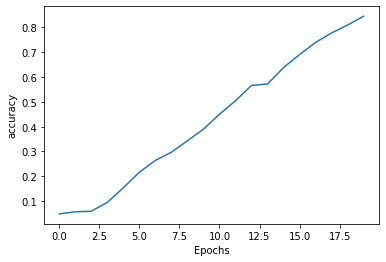

In [25]:
plot_graphs(history, 'accuracy')

In [34]:
model.load_weights(checkpoint_path)